# Spotify Artists and Music EDA

We will be checking which artists rank higher or lower depending on the audio features of their most played tracks. The features for an artist are extracted by taking a mean of all features of songs in the 'This Is Artist' playlists made by Spotify. This data is extracted using [Spotify API](https://developer.spotify.com/discover/) with the [Spotipy](https://github.com/plamere/spotipy) package using Python.

We will aim to find the following - 
* Which artists make music that is positive and uplifting?
* Which artists you can effectively dance to?
* Which artists depend on their music to be loud and energetic?
* What is the average duration of tracks that most artists aim for?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white',font='Lato', font_scale=1.1)

%matplotlib inline

## General Overview

In [2]:
df = pd.read_csv("audio_features.csv", sep=',', index_col=0)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Taylor Swift,0.631638,0.621586,4.741379,-6.544259,0.862069,0.073081,0.188578,0.000400,0.147191,0.457297,120.427172,224017.293103,3.982759
Ariana Grande,0.643400,0.571700,5.060000,-6.181440,0.580000,0.110232,0.246011,0.001219,0.163158,0.422540,116.321360,208419.920000,3.940000
Shawn Mendes,0.625120,0.545500,5.660000,-6.915420,0.680000,0.086182,0.379299,0.000005,0.181864,0.491788,118.504460,207729.620000,3.960000
Maroon 5,0.668240,0.698720,5.160000,-5.267820,0.620000,0.054754,0.146281,0.001210,0.169800,0.527222,115.967000,233145.760000,3.980000
Adele,0.519480,0.479800,4.800000,-6.986120,0.480000,0.040184,0.464470,0.006509,0.155796,0.304104,117.892520,254334.000000,3.800000


Some columns like key, mode and time_signature need to have integer values rather than floats. This will be inaccurate after taking mean of all the songs. Therefore, we will drop these and proceed with the analysis.

In [3]:
df.drop(columns=['key','mode','time_signature'], inplace=True)
df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
Taylor Swift,0.631638,0.621586,-6.544259,0.073081,0.188578,0.000400,0.147191,0.457297,120.427172,224017.293103
Ariana Grande,0.643400,0.571700,-6.181440,0.110232,0.246011,0.001219,0.163158,0.422540,116.321360,208419.920000
Shawn Mendes,0.625120,0.545500,-6.915420,0.086182,0.379299,0.000005,0.181864,0.491788,118.504460,207729.620000
Maroon 5,0.668240,0.698720,-5.267820,0.054754,0.146281,0.001210,0.169800,0.527222,115.967000,233145.760000
Adele,0.519480,0.479800,-6.986120,0.040184,0.464470,0.006509,0.155796,0.304104,117.892520,254334.000000


Checking the shape of the dataset after dropping the columns

In [4]:
df.shape

(50, 10)

Checking for duplicates in data

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Taylor Swift to David Bowie
Data columns (total 10 columns):
danceability        50 non-null float64
energy              50 non-null float64
loudness            50 non-null float64
speechiness         50 non-null float64
acousticness        50 non-null float64
instrumentalness    50 non-null float64
liveness            50 non-null float64
valence             50 non-null float64
tempo               50 non-null float64
duration_ms         50 non-null float64
dtypes: float64(10)
memory usage: 4.1+ KB


Checking to see if the Spotify API produced any NA or null values

In [7]:
df.isna().sum()

danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

# Artists Analysis

After cleaning the data and getting a basic overview of it, we will proceed with the analysis.

## Danceability

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. The distribution of values for this feature look like [this](https://developer.spotify.com/assets/audio/danceability.png "Sample Danceability Distribution").

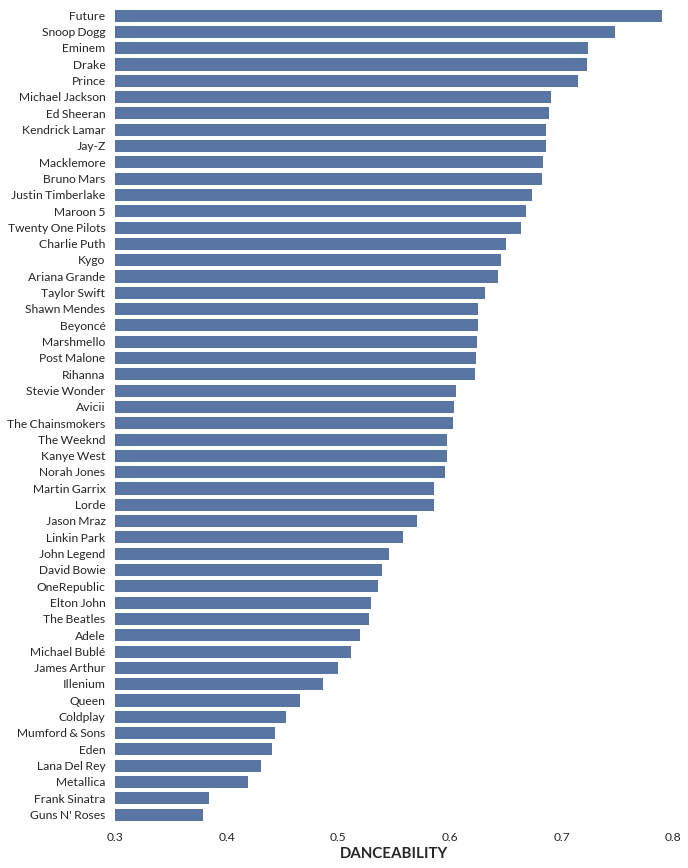

In [8]:
fig = plt.figure(figsize=(10,15))

dance = df.danceability.sort_values(ascending = False)

sns.barplot(x=dance, y=dance.index, color='b')

plt.xlabel('DANCEABILITY', fontdict={'weight':'bold', 'size':'15'})
plt.xlim(0.3,0.8)

sns.despine(left=True, bottom=True)

Surprisingly, rappers have comparitively more tracks that people can dance to. *Future*, *Snoop Dogg* and *Eminem* top the list whereas, artists like *Frank Sinatra* and *Guns N' Roses* are at the bottom. So we can conclude that, people find it easier to dance to *Future* but harder to dance to *Frank Sinatra* and Guns N' Roses.

## Energy

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. The distribution of values for this feature look like [this](https://developer.spotify.com/assets/audio/energy.png "Sample Energy Distribution").

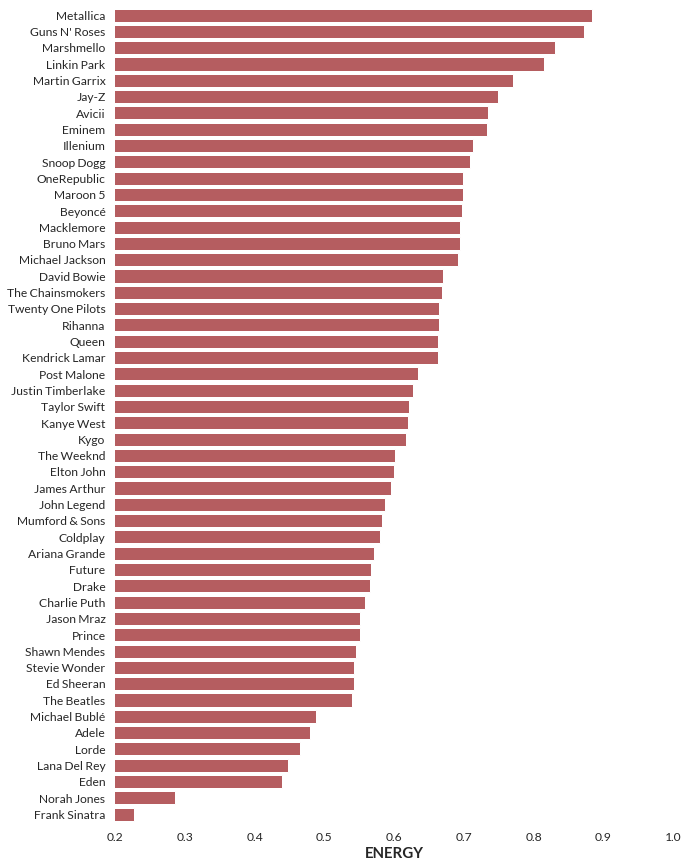

In [9]:
fig2 = plt.figure(figsize=(10,15))

energy = df.energy.sort_values(ascending=False)

sns.barplot(x=energy,y=energy.index, color='r')

plt.xlabel('ENERGY', fontdict={'weight':'bold', 'size':'15'})
plt.xlim(0.2,1)

sns.despine(left=True, bottom=True)

When it comes to Energy, we can expect some Heavy Metal bands and EDM artists at the top. *Metallica*, *Guns N' Roses* and *Linkin Park* have high energy as compared to *Norah Jones* and *Frank Sinatra* who have songs that are soft and slow.

It's fascinating how *Guns N' Roses* have tracks that aren't suitable to dance to, but at the same time, fast, energetic and loud.

## Valence

Now, Valence is very interesting. It's a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). The distribution of values for this feature look like [this](https://developer.spotify.com/assets/audio/valence.png "Sample Valence Distribution").

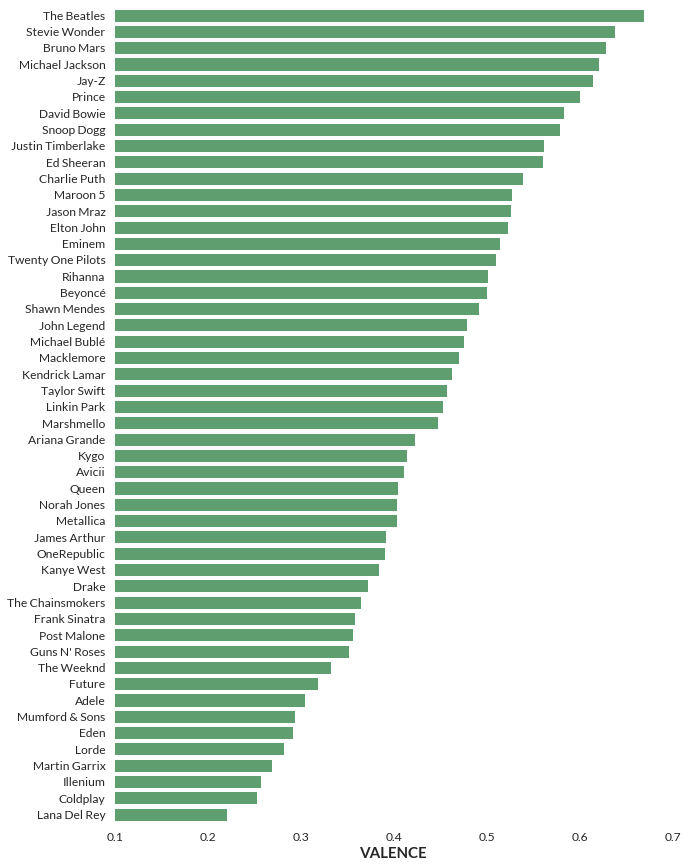

In [10]:
fig3 = plt.figure(figsize = (10,15))

valence = df.valence.sort_values(ascending=False)

sns.barplot(x=valence,y=valence.index, color='g')

plt.xlabel('VALENCE', fontdict={'weight':'bold','size':'15'})
plt.xlim(0.1,0.7)

sns.despine(left=True, bottom=True)

For valence, we see that *The Beatles* and *Bruno Mars* are among the artists at the top whereas, *Lana Del Ray* and *Coldplay* are at the bottom. If you've been listening to Coldplay and you fancy them, this is indeed very unsettling. *Lana Del Ray* and *Illenium* do have songs that are more inclined towards negative emotions.

So next time you feel low, turn up the volume to some Bruno Mars or Michael Jackson tracks and just feel the vibe!

## Loudness

Loudness represents the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. The distribution of values for this feature look like [this](https://developer.spotify.com/assets/audio/loudness.png "Sample Loudness Distribution").

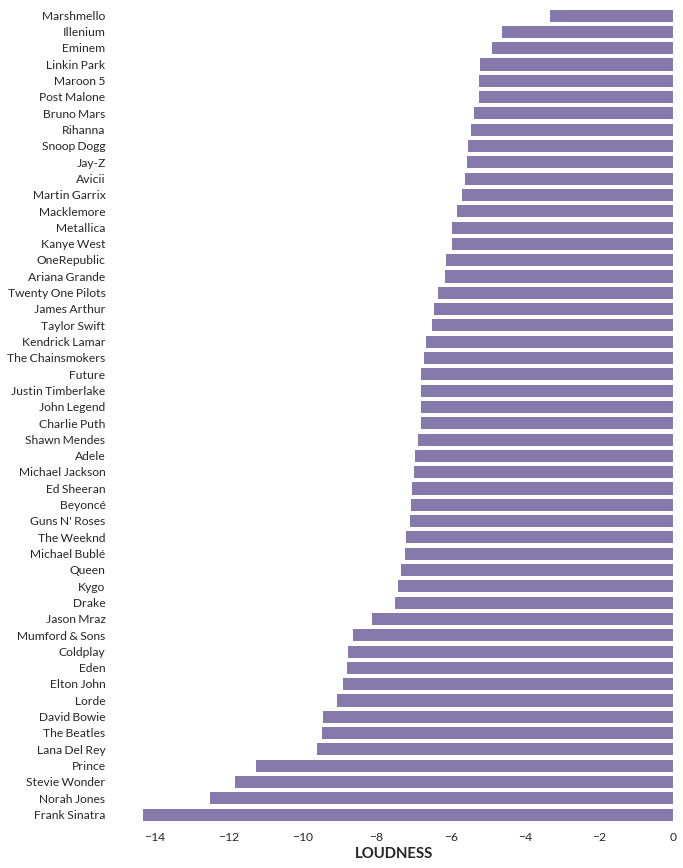

In [11]:
fig4 = plt.figure(figsize=(10,15))

loud = df.loudness.sort_values(ascending=False)

sns.barplot(x=loud,y=loud.index, color='m')

plt.xlabel('LOUDNESS', fontdict={'weight':'bold', 'size':'15'})
# plt.xlim(0.2,1)

sns.despine(left=True, bottom=True)

When it comes to loudness, we think of EDM and Rock. Here, as we can see *Marshmello*, *Illenium* and *Linkin Park* top the list and Eminem makes an appearance out of the blue as well. At the bottom of the list, we see artists that produce music that is softer and more quiet like *Frank Sinatra* and *Norah Jones*.

## Speechiness

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. The distribution of values for this feature look like [this](https://developer.spotify.com/assets/audio/speechiness.png "Sample Speechiness of Songs").

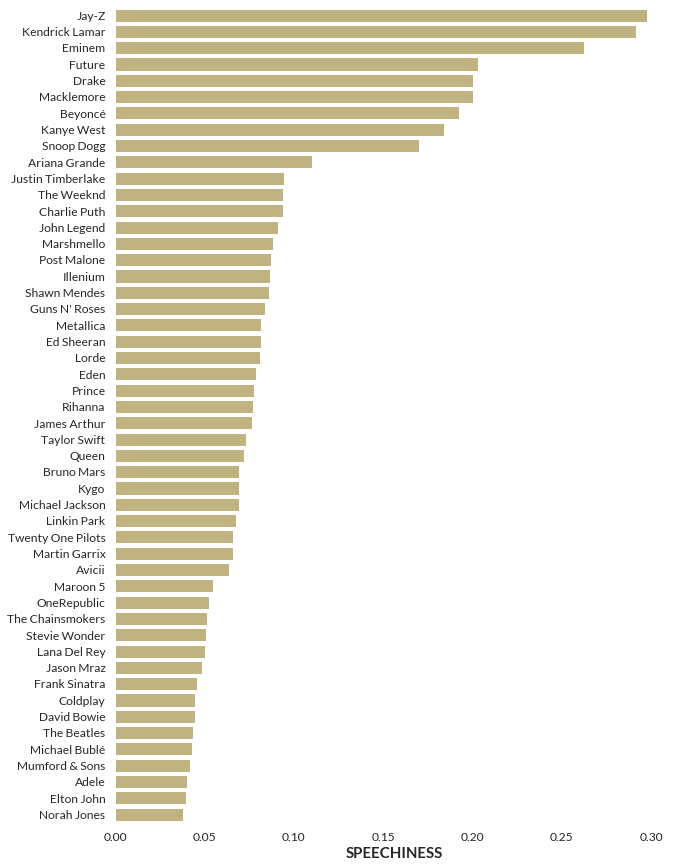

In [12]:
fig5 = plt.figure(figsize = (10,15))

speech = df.speechiness.sort_values(ascending=False)

sns.barplot(x=speech,y=speech.index,color='y')

plt.xlabel('SPEECHINESS', fontdict={'weight':'bold', 'size':'15'})

sns.despine(left=True, bottom=True)

Speechiness, as we can presume is the highest in rap. I was expecting Eminem to be higher on the list after setting the world record for most words in one song. Totaling 1560 words in 6 minutes and rapping 97 words in a 15 second spell with Rap God really put him at the top of the game.
<br>
Enough about that, as we can see *Jay-Z* and *Kendrick Lamar* top this one, whereas artist like *Adele* and *Elton John* have less speech-like tracks and are more layered with dense music.

## Tempo

Tempo is the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. The distribution of values for this feature look like [this](https://developer.spotify.com/assets/audio/tempo.png "Sample Tempo Distribution").

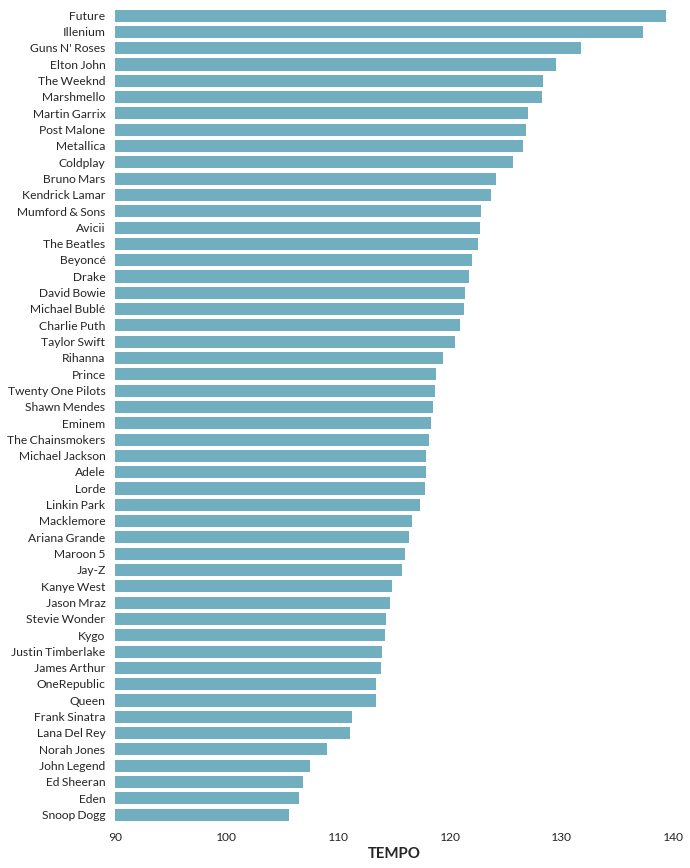

In [13]:
fig6 = plt.figure(figsize = (10,15))

tempo = df.tempo.sort_values(ascending=False)

sns.barplot(x=tempo,y=tempo.index,color='c')

plt.xlabel('TEMPO', fontdict={'weight':'bold', 'size':'15'})
plt.xlim(90,140)

sns.despine(left=True, bottom=True)

Tempo, also called rhythm or pulse is a very important trait of any track. Tempo defines the beat of the music and influences alot of factors. Personally, I like music that is either very high on tempo or extremely low.
If you try finding either *Illenium*, *The Weeknd*, *Post Malone* or *Eden* and *OneRepublic*, you'll see what I mean. 

Typically, people while running also like to complement their music with the speed they are running at.
If you'd like to try that as well, Spotify has some runnning playlists curated for you. If you are out for a run and you want to match your pace with the tempo, be sure to check these out - [Fun Run 150BPM](https://open.spotify.com/playlist/37i9dQZF1DXadOVCgGhS7j), [Runner's Club 160BPM](https://open.spotify.com/playlist/37i9dQZF1DX4osfY3zybD2) and [Lactic Acid 175BPM](https://open.spotify.com/playlist/37i9dQZF1DXcCEH5EfTtzp).

## Duration

Duration is simply the length of the track recorded in 'ms' for this dataset.

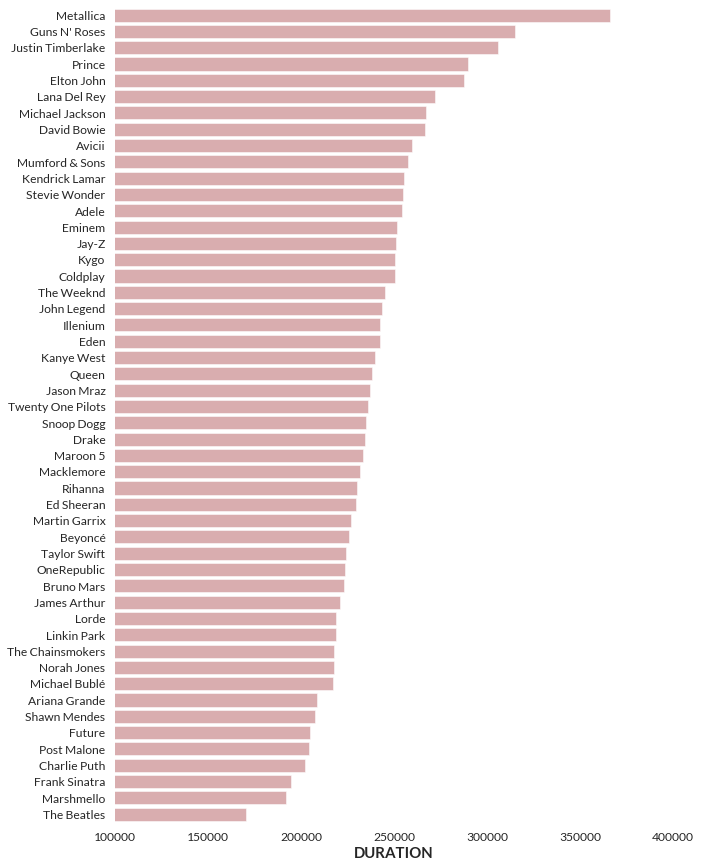

In [16]:
fig7 = plt.figure(figsize = (10,15))

dur = df.duration_ms.sort_values(ascending=False)

sns.barplot(x=dur,y=dur.index,color='r',alpha=0.5)

plt.xlabel('DURATION', fontdict={'weight':'bold', 'size':'15'})
plt.xlim(100000,400000)

sns.despine(left=True, bottom=True)

As we see, bands like *Metallica*, *Guns N' Roses* and even some artists like *Justin Timberlake* and *Prince* depend on their tracks to be of a longer duration than others. Surprisingly, some famous names like *The Beatles* and *Marshmello* are on the other end of the spectrum. 

With that, we conclude our analysis of the Spotify Artists dataset. Figuring out what music people love and hate depending on the traits and various qualities associated with each track has been really enthralling. 

The next time someone hands me the AUX cable and asks me to play some uplifting or energetic music, I'll be sure where to look.